<a href="https://colab.research.google.com/github/singithi03/Data-Analytics_s5214680/blob/Lab-4/Electricity_Consumption_Exploration(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [151]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [152]:
# Load file
df = pd.read_csv('opsd_germany_daily.csv')
df.head()


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [153]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [154]:
# Transform the dates into datetime format
import datetime

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(pd.DatetimeIndex(df['Date']))
type(df.index)


pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

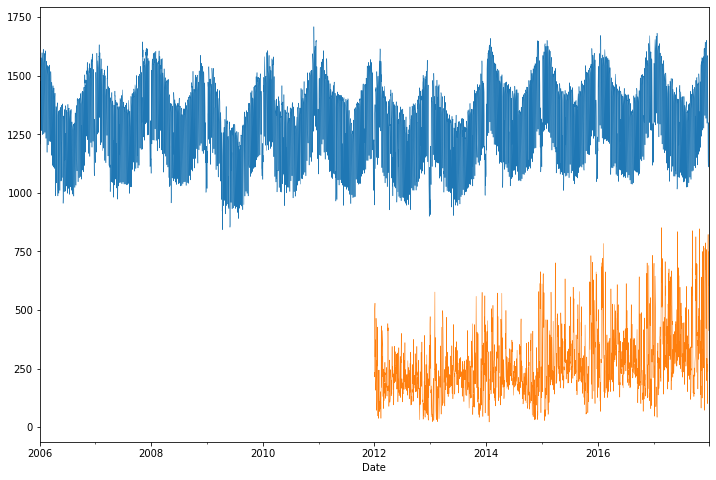

In [155]:
plt.figure(figsize=(12,8))
df['Consumption'].plot(linewidth=0.5)
df['Wind+Solar'].plot(linewidth=0.5)
plt.show()


We can also avoid plotting lines and simply plot dots for the consumption :

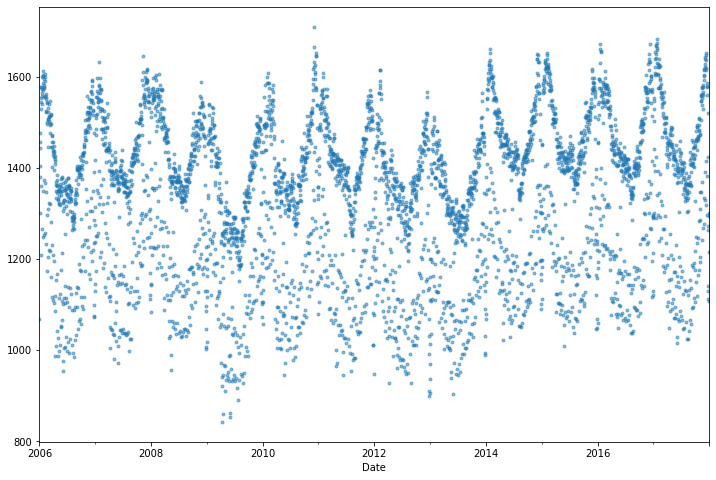

In [202]:
plt.figure(figsize=(12,8))
df['Consumption'].plot(linewidth=0.5, marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True )

plt.show()

And plot the production over time :

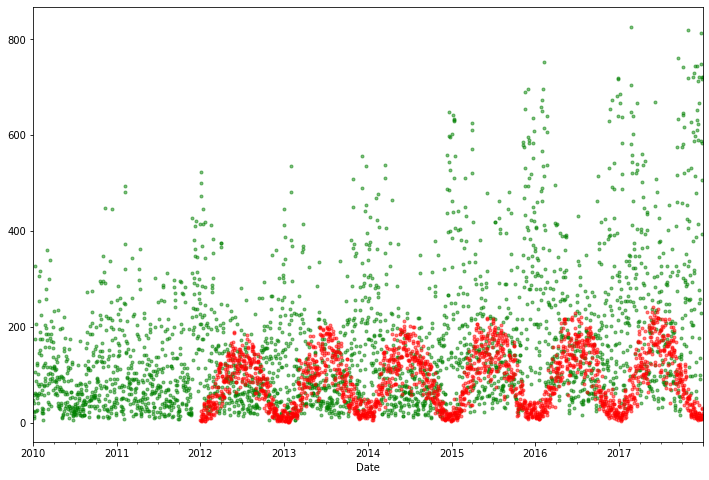

In [157]:
fig = plt.figure(figsize=(12,8))
ax1 = df.loc['2010':'2018','Wind'].plot(linewidth=0.5, marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True, color='g' )
ax2 = df.loc['2010':'2018','Solar'].plot(linewidth=0.5, marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True, color='r' )
fig.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

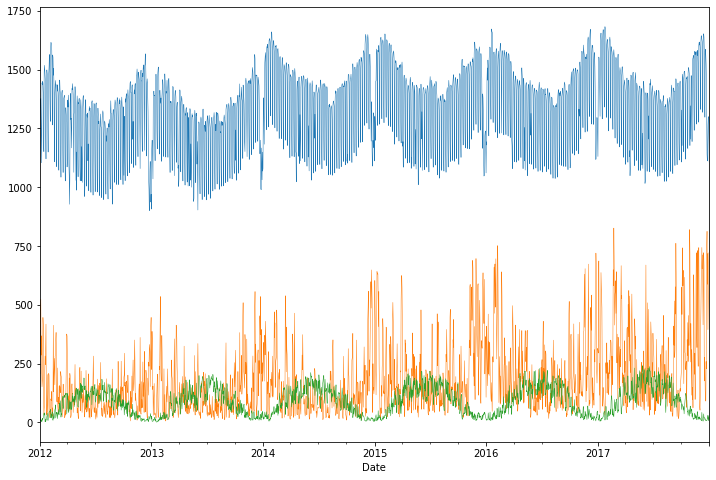

In [158]:
fig1 = plt.figure(figsize=(12,8))
ax3 = df.loc['2012':'2018', 'Consumption'].plot(linewidth=0.5)
ax4 = df.loc['2012': '2018','Wind'].plot(linewidth=0.5)
ax5 = df.loc['2012': '2018','Solar'].plot(linewidth=0.5)

fig1.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

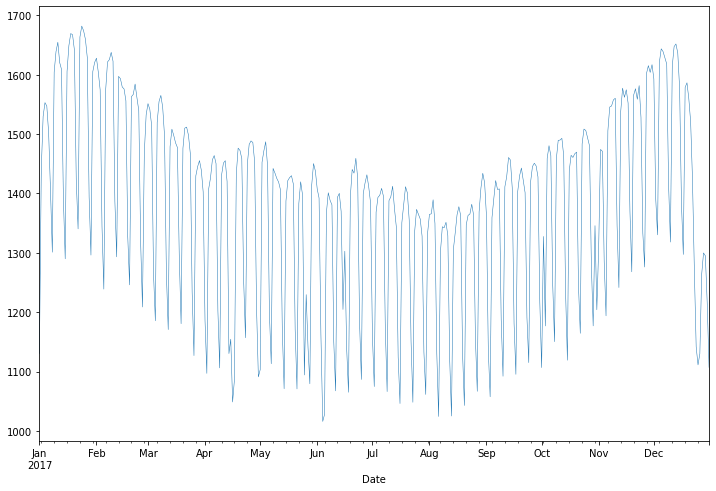

In [159]:
# Plot over the year
plt.figure(figsize=(12,8))
df.loc['2017':'2018', 'Consumption'].plot(linewidth=0.5)

plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

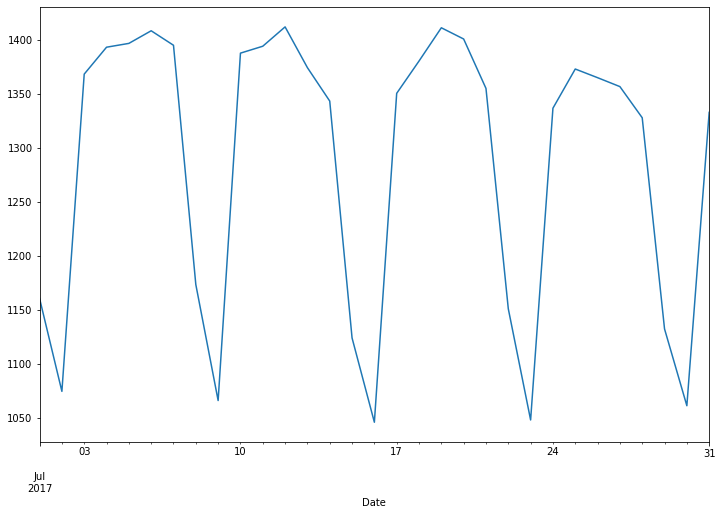

In [160]:
# Plot over a month
plt.figure(figsize=(12,8))
ax = df.loc['2017-07':'2017-07', 'Consumption'].plot(linestyle='-')
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

NameError: ignored

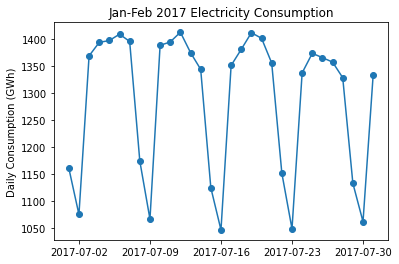

In [161]:
import matplotlib.dates as mdates
# Plot on Sundays

fig, ax = plt.subplots()
ax.plot(df.loc['2017-07':'2017-07', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
result = pd.Series(pd.date_range('2017-07-01', '2017-07-31',
                                 periods = 52, 
                                 freq = byweekday))
ax.vlines(x=[datetime(2017, 7, 1), '2017-07-31'], color='r')
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [185]:
# new columns 'year' and 'month'
df.groupby(pd.Grouper(freq='M')) 
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
years = df['year'].unique()
print(years)
df.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,,
2006-01-01,2006-01-01,1069.184,NaN,NaN,NaN,2006,1
2006-01-02,2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2006-01-03,2006-01-03,1442.533,NaN,NaN,NaN,2006,1
2006-01-04,2006-01-04,1457.217,NaN,NaN,NaN,2006,1
2006-01-05,2006-01-05,1477.131,NaN,NaN,NaN,2006,1


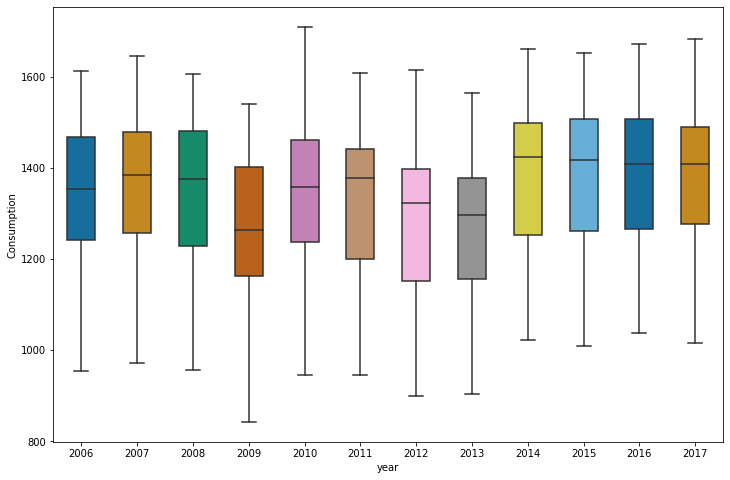

In [173]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
bplot = sns.boxplot(y='Consumption', x='year', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

plt.show()

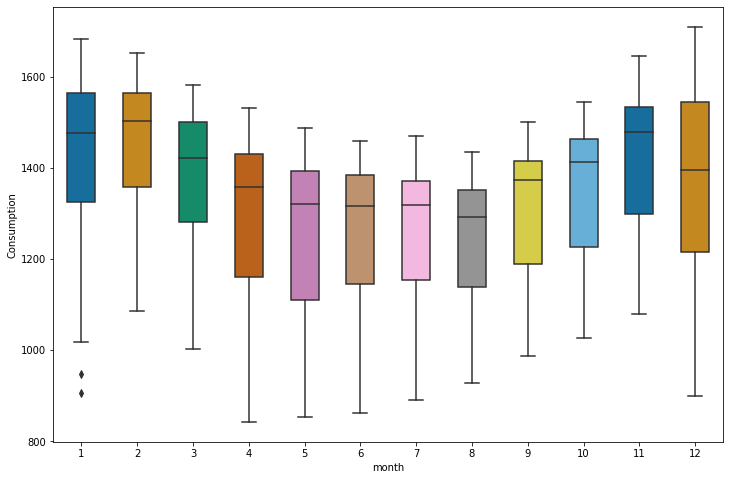

In [174]:
# Boxplot month
import seaborn as sns

plt.figure(figsize=(12,8))
bplot = sns.boxplot(y='Consumption', x='month', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

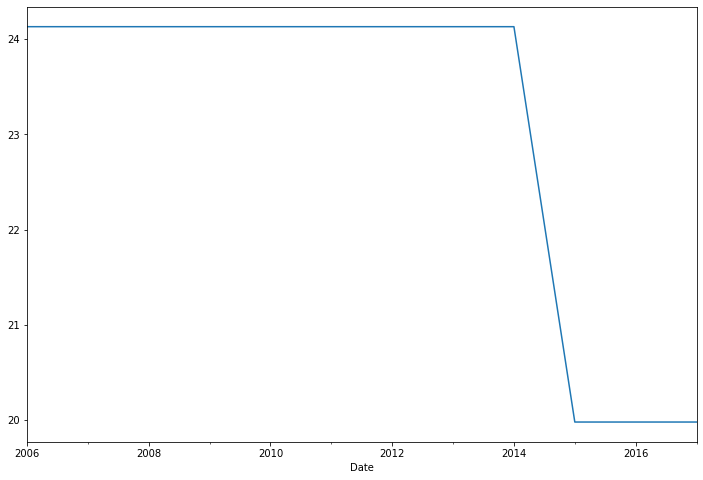

In [188]:
# Plot Solar
plt.figure(figsize=(12,8))
times_sample = pd.to_datetime(['2006-01-01','2015-02-10','2017-12-31'])
# Select the specified dates and just the Consumption column
consum_sample = df.loc[times_sample, ['Solar']].copy()
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('Y')
# Create a column with missings backward filled
consum_freq['Solar - Backwardfill'] = consum_sample.asfreq('Y',method='bfill')
consum_freq['Solar - Backwardfill'].plot()
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [190]:
# Correlation between consumption and overall production
cor = df['Consumption'].corr(df['Wind+Solar'])
cor

0.02764784385924091

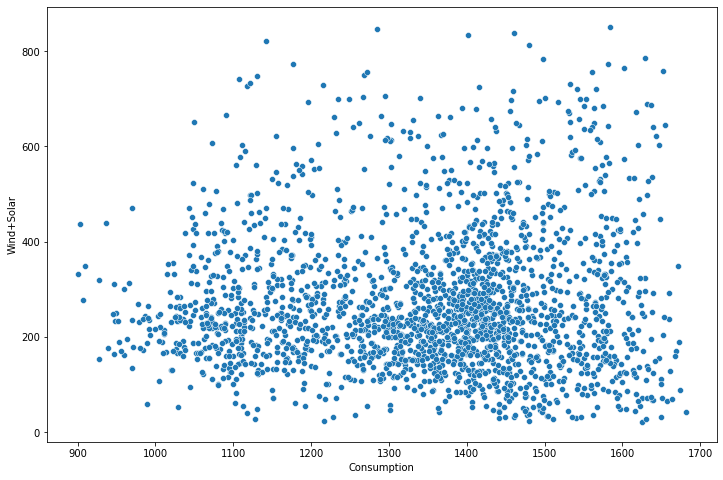

In [189]:
import seaborn as sns
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x="Consumption", y="Wind+Solar", data=df);
plt.show()

In [192]:
# Correlation between solar production and wind production
cor = df['Solar'].corr(df['Wind'])
cor

-0.30883182959773414

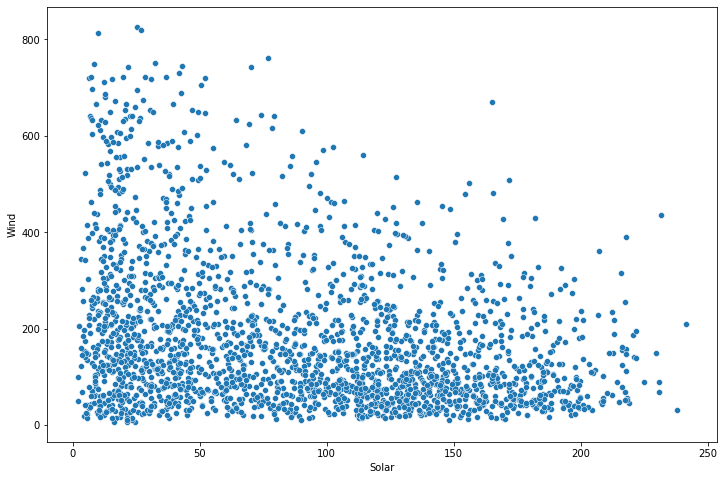

In [191]:
# Plot
import seaborn as sns
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x="Solar", y="Wind", data=df);
plt.show()

In [193]:
# Correlation between consumption and wind production
cor = df['Consumption'].corr(df['Wind'])
cor

0.13682075809765848

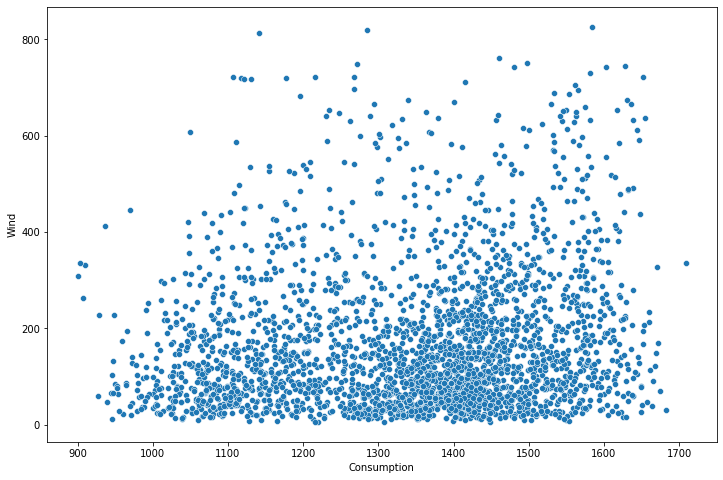

In [195]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x="Consumption", y="Wind", data=df);
plt.show()

In [194]:
# Correlation between consumption and solar production
cor = df['Consumption'].corr(df['Solar'])
cor

-0.27894265519914385

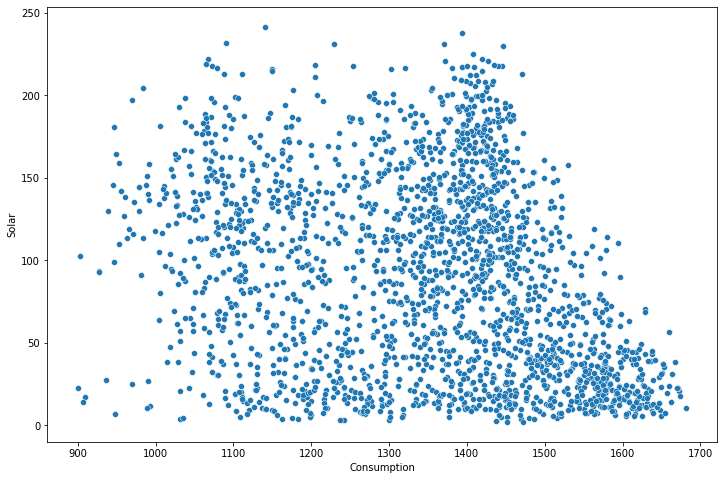

In [196]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x="Consumption", y="Solar", data=df);
plt.show()